# Part 2: Recommendation Report with Visualizations

# 1. Reading in Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
# Read in data through url on Github
url = 'https://raw.githubusercontent.com/xinegan88/some_files/master/master_df.csv'
df_x = pd.read_csv(url)

In [3]:
df = df_x.copy() # creating a copy to avoid error messages

In [4]:
df.head() # lets check out the first few rows to make sure it all works! 

,Year,Title,TheatricalDistributor,Genre,Source,ProductionMethod,CreativeType,Budget,DomesticGross,InternationalGross,WorldwideGross,NetProfits,roi
0,2010,Toy Story 3,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000,415004880,653874642,1068879522,868879522,4.0
1,2010,Alice in Wonderland,Walt Disney,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,200000000,334191110,691300000,1025491110,825491110,4.0
2,2010,Iron Man 2,Paramount Pictures,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,170000000,312433331,308723058,621156389,451156389,3.0
3,2010,The Twilight Saga: Eclipse,Summit Entertainment,Drama,Based on Fiction Book/Short Story,Live Action,Fantasy,68000000,300531751,405571077,706102828,638102828,9.0
4,2010,Harry Potter and the Deathly Hallows:…,Warner Bros.,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,125000000,296131568,664297789,960429357,835429357,7.0


# 2. Guiding Questions, Recommendations, and Visualizations

### *The Winning Formula* strategy prescribes that Microsoft diversify projects among two main groups:    
* High-Risk/High-Reward films
* Low-Risk/Low-Reward films.   
Below, we propose a set of three guiding questions that should be examined while choosing projects in each of those categories.

### A) What kind of movie should we make? 
Genre, Production Method, and Creative Type Recommendations

#### Recommendation
* Diversify projects between low-risk/low-return films and high-risk/high-return films.   
* For high-risk films, the top genres with respect to profits are actions, adventures, and musicals (Fig. 2.2.1)   
    * Live Action/Animation Hybrids (Action and Adventure) and Animated (Musicals) seem to do well. (Fig 2.2.2)   
    * Superhero movies are a creative-type that increases the chances of success in this category.   (Fig 2.2.3)
    * Focus should be on actual revenues as opposed to ROI (Fig. 2.1)
* For low-risk films, the top genres with respect to ROI are horror, thriller/suspense, drama, and comedy. (Fig.2.2.4) 
    * For these kinds of films, live action is the best Production Method. (Fig. 2.2.5)
    * Fantasy films out-perform other creative types in this category. (Fig. 2.2.6)

#### How we selected these recommendations:
1) Our database was comprised of 1000 high-grossing movies. Since all the movies were considered high-grossing, we used ROI as a measure to determine profitability.    
2) The average ROI was calculated, and the data was filtered to produce a set of movies with above-average ROI.   
3) The representation of genres was examined to determine which genres appeared most frequently among movies with above average ROI.

In [5]:
# what kind of movies have above average return on investment?
x = df.roi.mean() # what is the average roi?
x # ~ 4.7

4.7044989775051125

In [6]:
y = df[df.roi > x] # subset of movie genres have above average ROI
y.Genre.value_counts() # frequency of genres among the subset

Drama                  55
Horror                 50
Comedy                 30
Thriller/Suspense      29
Adventure              27
Action                 24
Romantic Comedy         9
Black Comedy            7
Musical                 4
Concert/Performance     3
Western                 1
Documentary             1
Name: Genre, dtype: int64

In [7]:
y.Genre.value_counts(normalize=True) * 100 # what percentage of the data has a particular genre?

Drama                  22.916667
Horror                 20.833333
Comedy                 12.500000
Thriller/Suspense      12.083333
Adventure              11.250000
Action                 10.000000
Romantic Comedy         3.750000
Black Comedy            2.916667
Musical                 1.666667
Concert/Performance     1.250000
Western                 0.416667
Documentary             0.416667
Name: Genre, dtype: float64

It is clear from the subset of movies that have above averge ROI, that the following genres are over-represented:    
* Drama
* Horror
* Comedy
* Thriller/Suspense
* Adventure
* Action

**Note:** We are including musicals in our recommendations because despite the margins being too small to make our original list, the actual profits are so large that they generate substantial revenue. (Fig 2.1.1)    

#### Below, two subsets of data are created to represent high-risk movies and low risk movies:


In [8]:
df = df[(df.Title != 'The Gallows') & (df.Title != 'La La Land')]
# these were two outliers that interferred with our scatter plots

In [9]:
hr_df = df[df.Genre.isin(['Adventure','Action','Musical'])].sort_values(by = 'roi', ascending = False) # data set of  hr/hr movies

In [10]:
lr_df = df[df.Genre.isin(['Drama','Horror','Comedy','Thriller/Suspense'])].sort_values(by = 'roi', ascending = False) # data set of lr/lr

## 2.1 Heatmaps

In [11]:
# Fig 2.1.1 Heatmap(A) Data 

# making a pivot table for Annual Worldwide Gross Means by Genre
genre_pivot = pd.pivot_table(df, values='WorldwideGross', index=['Genre'],
                    columns=['Year'], aggfunc=np.mean).fillna(0)

# iterate over years and change the number to millions
for i in range(2010,2020):
    genre_pivot[i] = genre_pivot[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)

In [12]:
# Fig 2.1.1 Heatmap(B)

# making a pivot table for Annual Net Profit Means by Genre 2010-2019
group_genre_profit = pd.pivot_table(df, values='NetProfits', index=['Genre'],
                    columns=['Year'], aggfunc='mean').fillna(0)

# iterate over years and change the number to millions
for i in range(2010,2020):
    group_genre_profit[i] = group_genre_profit[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)

In [13]:
# Fig 2.1.1 Heatmap(C)
# making a pivot table table for ROI Means by Genre 2010-2019
group_genre_roi = pd.pivot_table(df, values='roi', index=['Genre'], columns=['Year'], aggfunc='mean').fillna(0)

Fig. 2.1.1


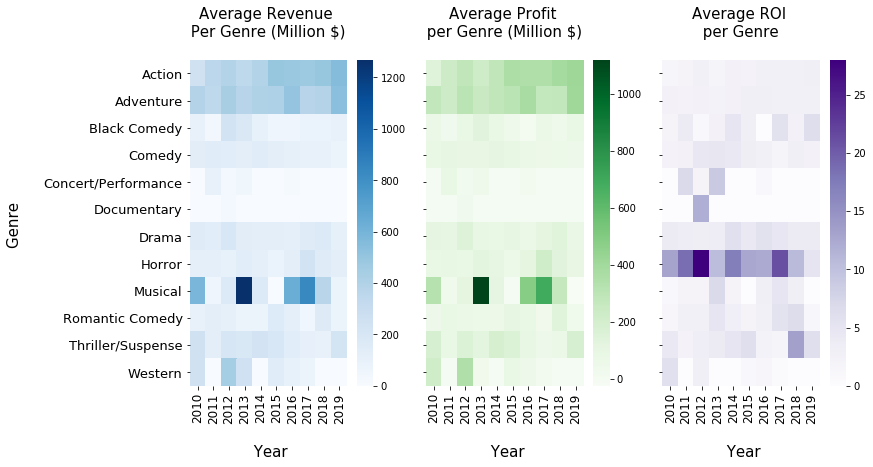

In [14]:
## plotting Heatmaps (A,B,C)
print("Fig. 2.1.1")
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,6), sharey=True)

# Genre and overall gross revenue average
r1 = sns.heatmap(genre_pivot, cmap='Blues', ax=ax1)
r1.set_title("Average Revenue \n Per Genre (Million $) \n", fontsize=15)
r1.tick_params(axis='y', labelsize=13)
r1.tick_params(axis='x', labelsize=12)
r1.set_ylabel('Genre \n', fontsize=15)
r1.set_xlabel('\n Year', fontsize=15)

# Genre and overall net profit average
r2 = sns.heatmap(group_genre_profit, cmap='Greens', ax=ax2)
r2.set_title("Average Profit \n per Genre (Million $) \n", fontsize=15)
r2.set_ylabel("")
r2.set_xlabel('\n Year', fontsize=15)
r2.tick_params(axis='x', labelsize=12)

# Genre and overall ROI average
r3 = sns.heatmap(group_genre_roi, cmap='Purples', ax=ax3)
r3.set_title("Average ROI \n per Genre \n", fontsize=15)
r3.set_ylabel("")
r3.set_xlabel('\n Year', fontsize=15)
r3.tick_params(axis='x', labelsize=12)

## 2.2 Boxplots

In [15]:
# a function to convert to millions
def to_million(x, pos):    
    return '$%1.0f' % (x*1e-6)

Fig 2.2.1


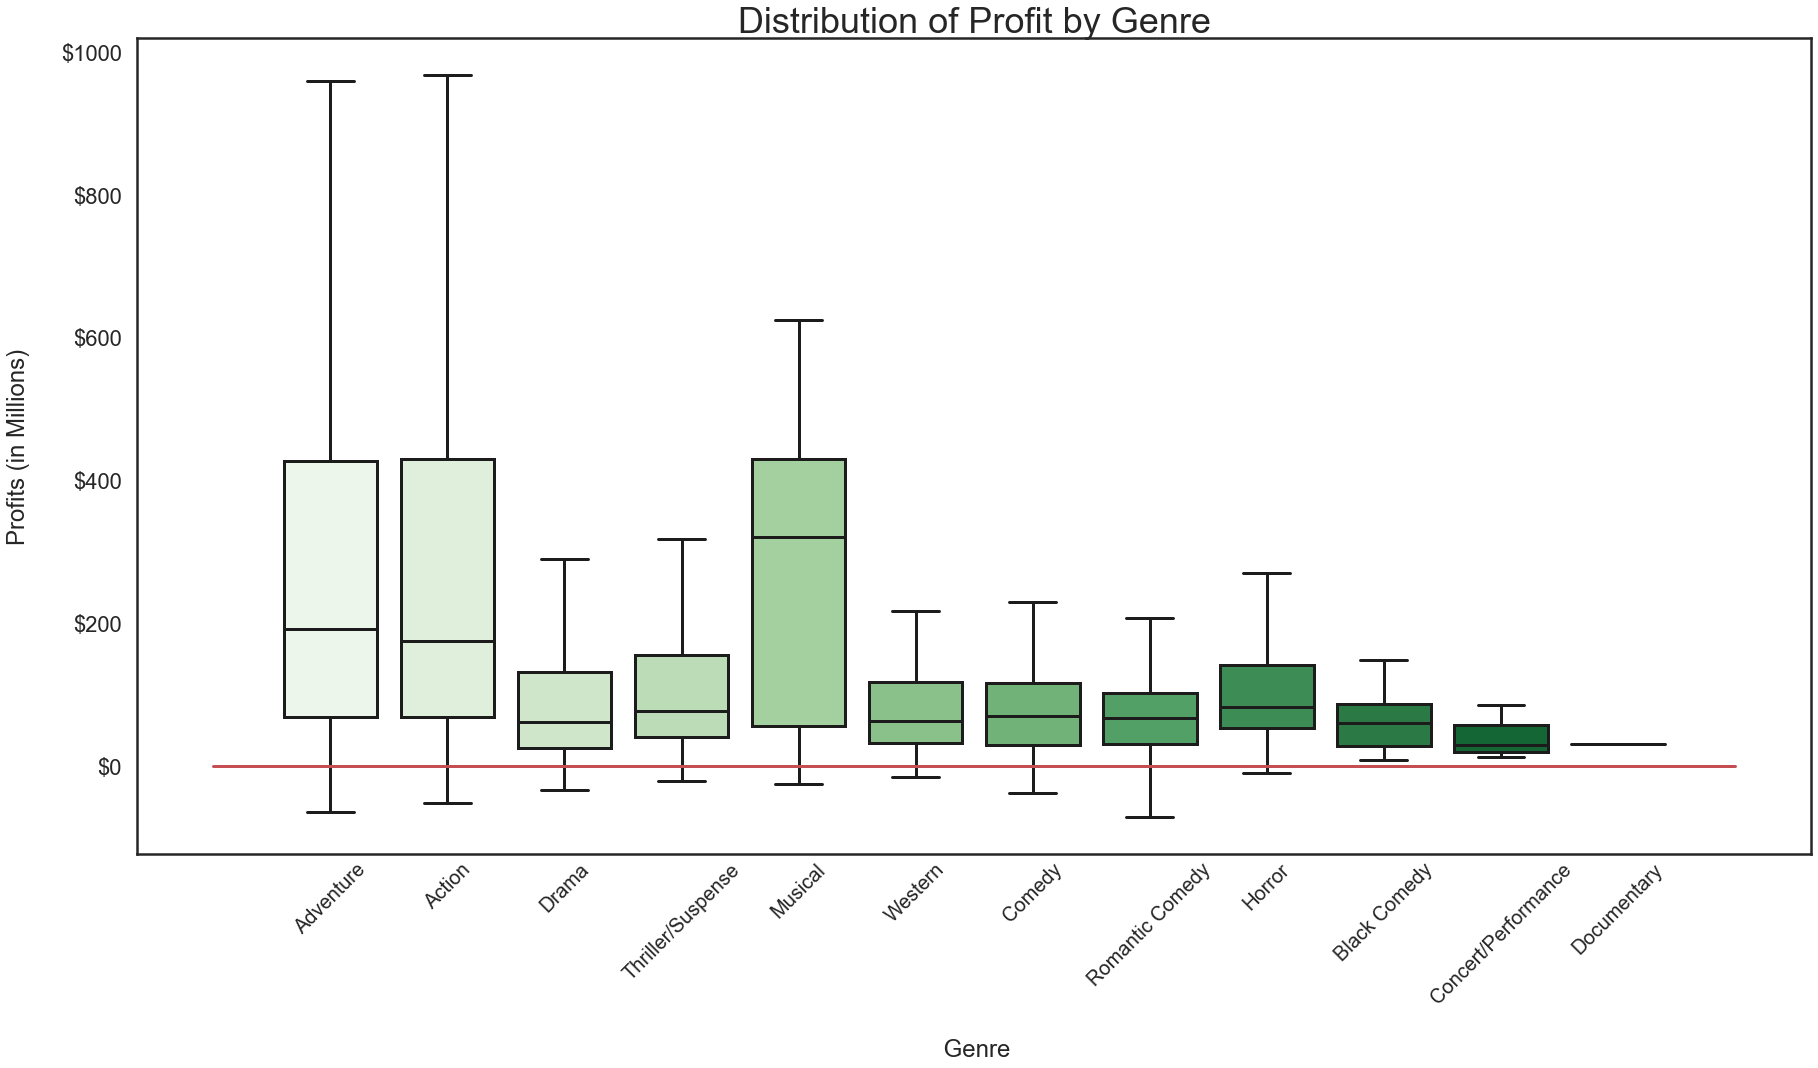

In [16]:
# Fig 2.2.1 Boxplot of Profit Distribution Among All Genres

print("Fig 2.2.1")
sns.set(rc={'figure.figsize':(12,9)})
sns.set_context('poster')
sns.set_style('white')

plt.figure(figsize=(30,15))
plt.title("Distribution of Profit by Genre", size=36)
ax = sns.boxplot(x="Genre", y="NetProfits", data=df, palette='Greens', showfliers=False)
ax.tick_params(axis="x", labelsize=20, rotation = 45, length=2)
ax.set_xlabel("\n Genre", size=24)
ax.set_ylabel("Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax.yaxis.set_major_formatter(format_y)
x_coordinates = [-1, 12]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, color='r')
# need to slant the x-axis

### High-Risk Movies

Fig 2.2.2


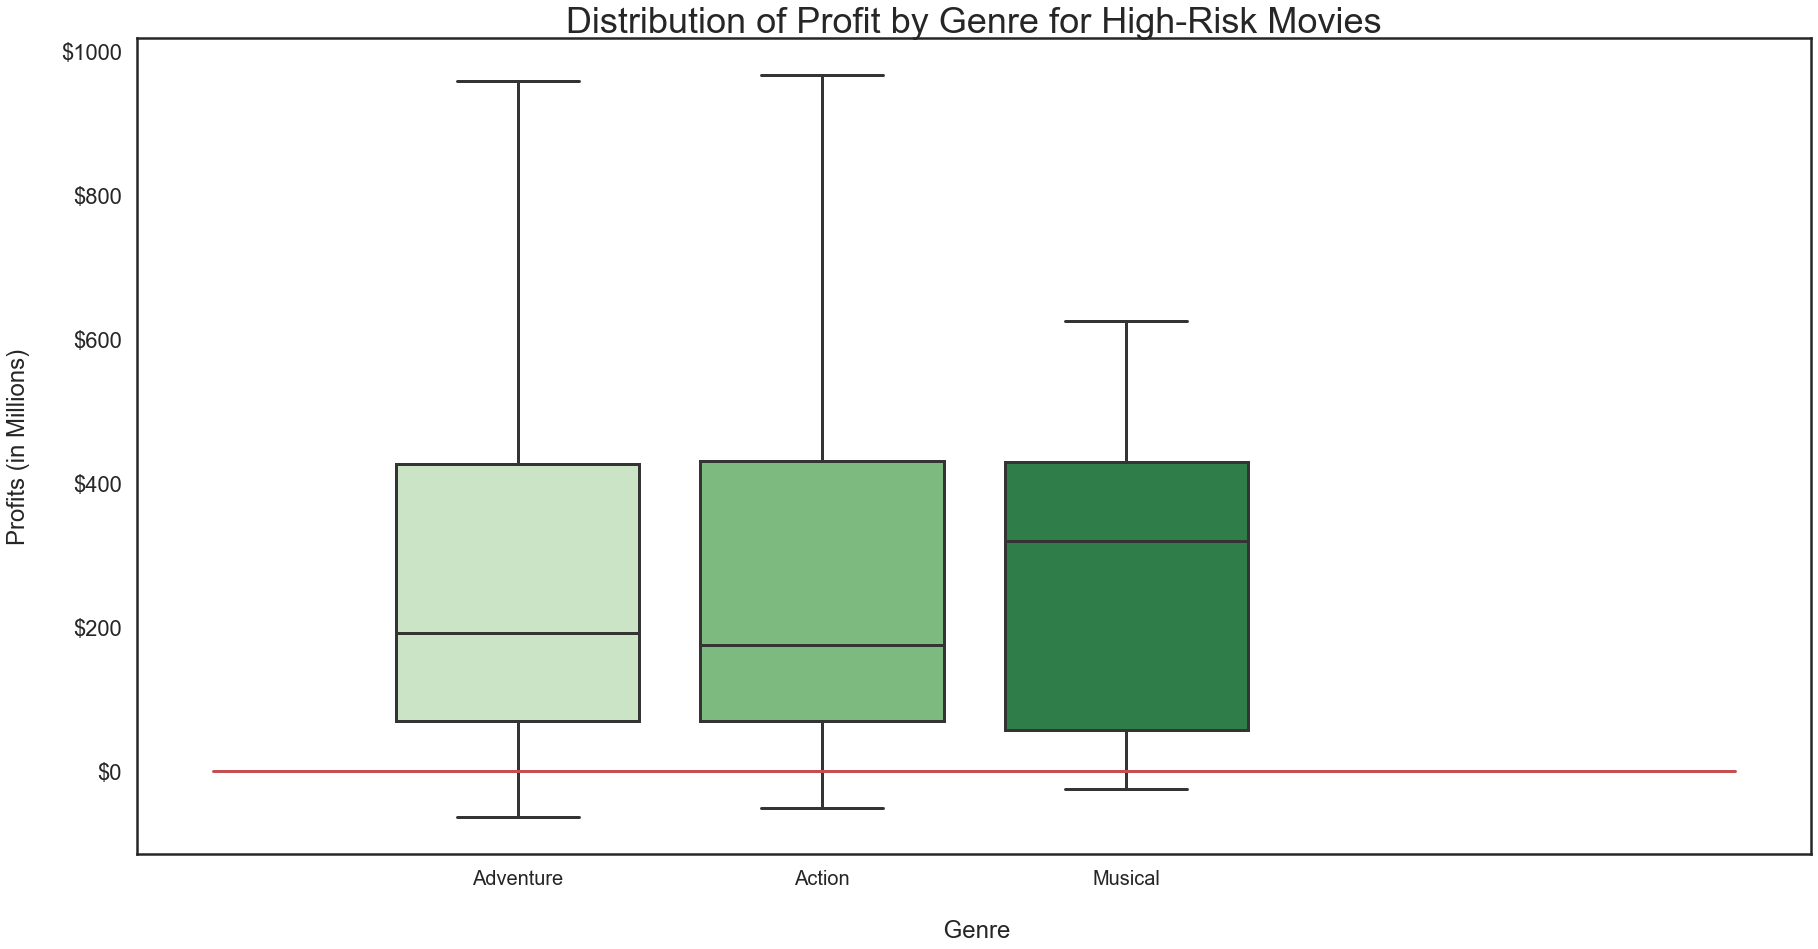

In [17]:
# Fig 2.2.2 Boxplot of Profit Distribution Among High-Risk Genres
print("Fig 2.2.2")

sns.set(rc={'figure.figsize':(12,9)})
sns.set_context('poster')
sns.set_style('white')


plt.figure(figsize=(30,15))
plt.title("Distribution of Profit by Genre for High-Risk Movies", size=36)
ax = sns.boxplot(x="Genre", y="NetProfits", data=hr_df, palette='Greens', showfliers=False)
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel("\n Genre", size=24)
ax.set_ylabel("Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax.yaxis.set_major_formatter(format_y)
x_coordinates = [-1, 4]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, color='r')

Fig 2.2.3


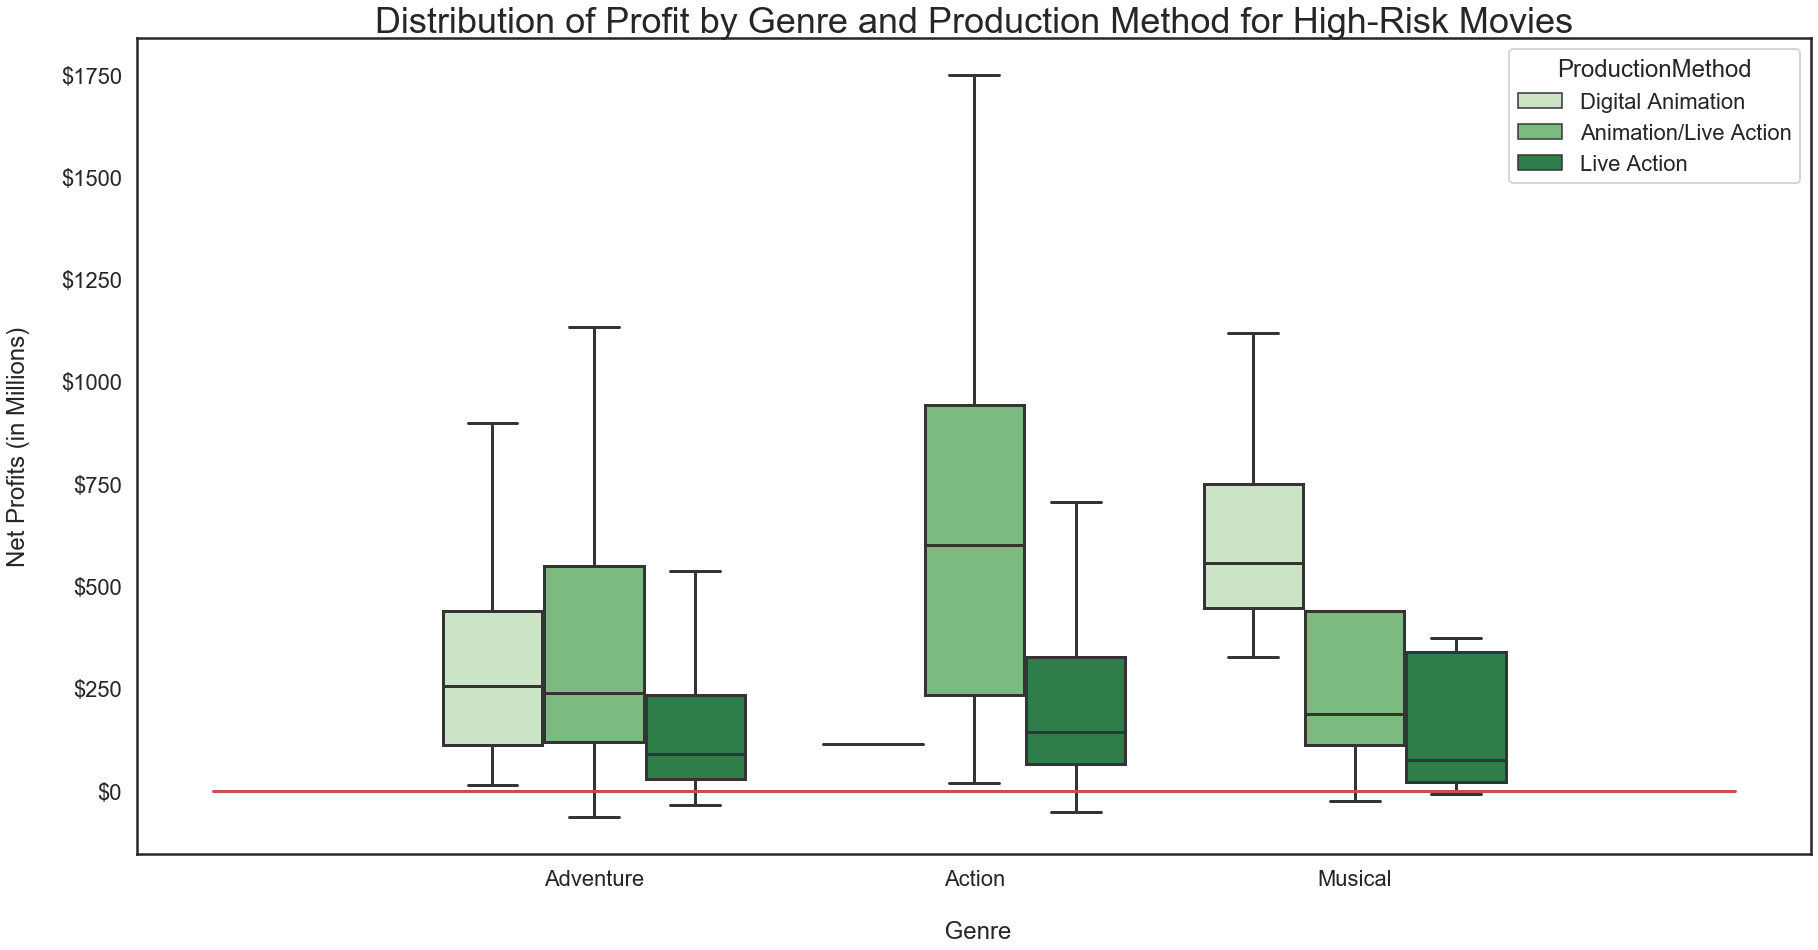

In [18]:
# Fig 2.2.3 Boxplot of Profit Distribution Among High-Risk Genres by Production Method
print("Fig 2.2.3")

sns.set(rc={'figure.figsize':(12,9)})
sns.set_context('poster')
sns.set_style('white')

plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='Genre', y='NetProfits', hue='ProductionMethod', data=hr_df, palette='Greens', showfliers=False)
plt.title("Distribution of Profit by Genre and Production Method for High-Risk Movies", size=36)
plt.xlabel("\n Genre", size=24)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-1, 3]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')

Fig 2.2.4


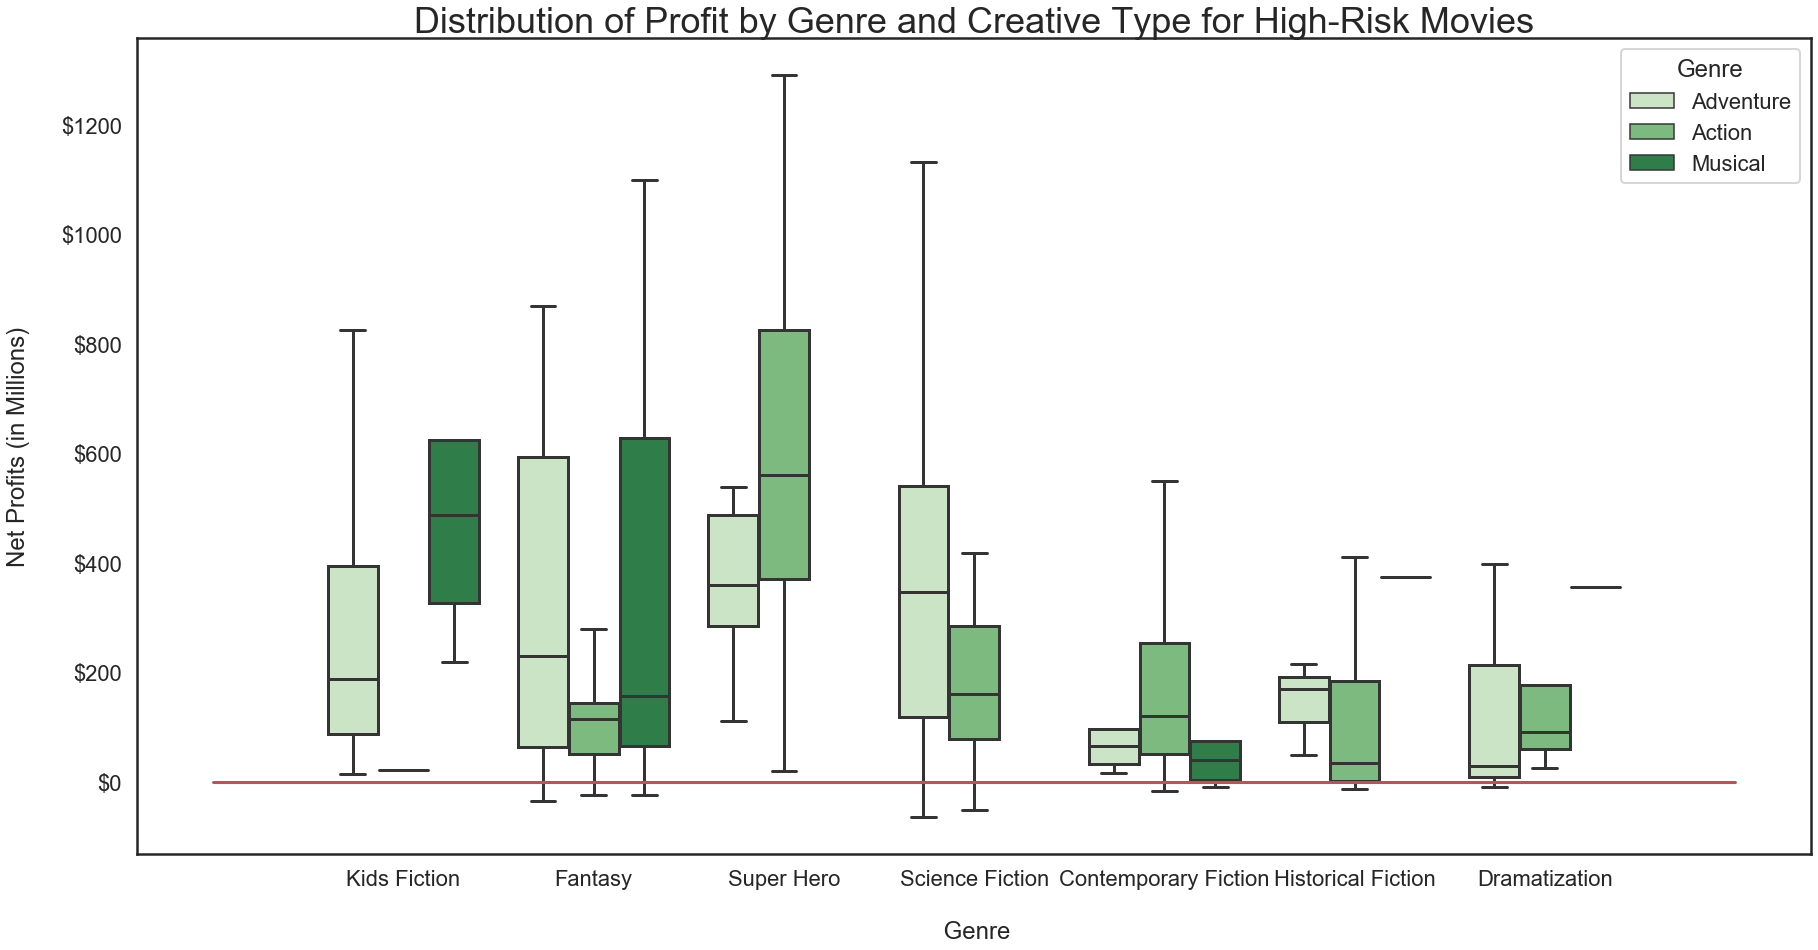

In [19]:
# Fig 2.2.4 Boxplot of Profit Distribution Among High-Risk Genres
print("Fig 2.2.4")

sns.set(rc={'figure.figsize':(12,9)})
sns.set_context('poster')
sns.set_style('white')

plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='CreativeType', y='NetProfits', hue='Genre', data=hr_df, palette='Greens', showfliers=False)
plt.title("Distribution of Profit by Genre and Creative Type for High-Risk Movies", size=36)
plt.xlabel("\n Genre", size=24)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-1, 7]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')

### Low-Risk Movies

Fig 2.2.5


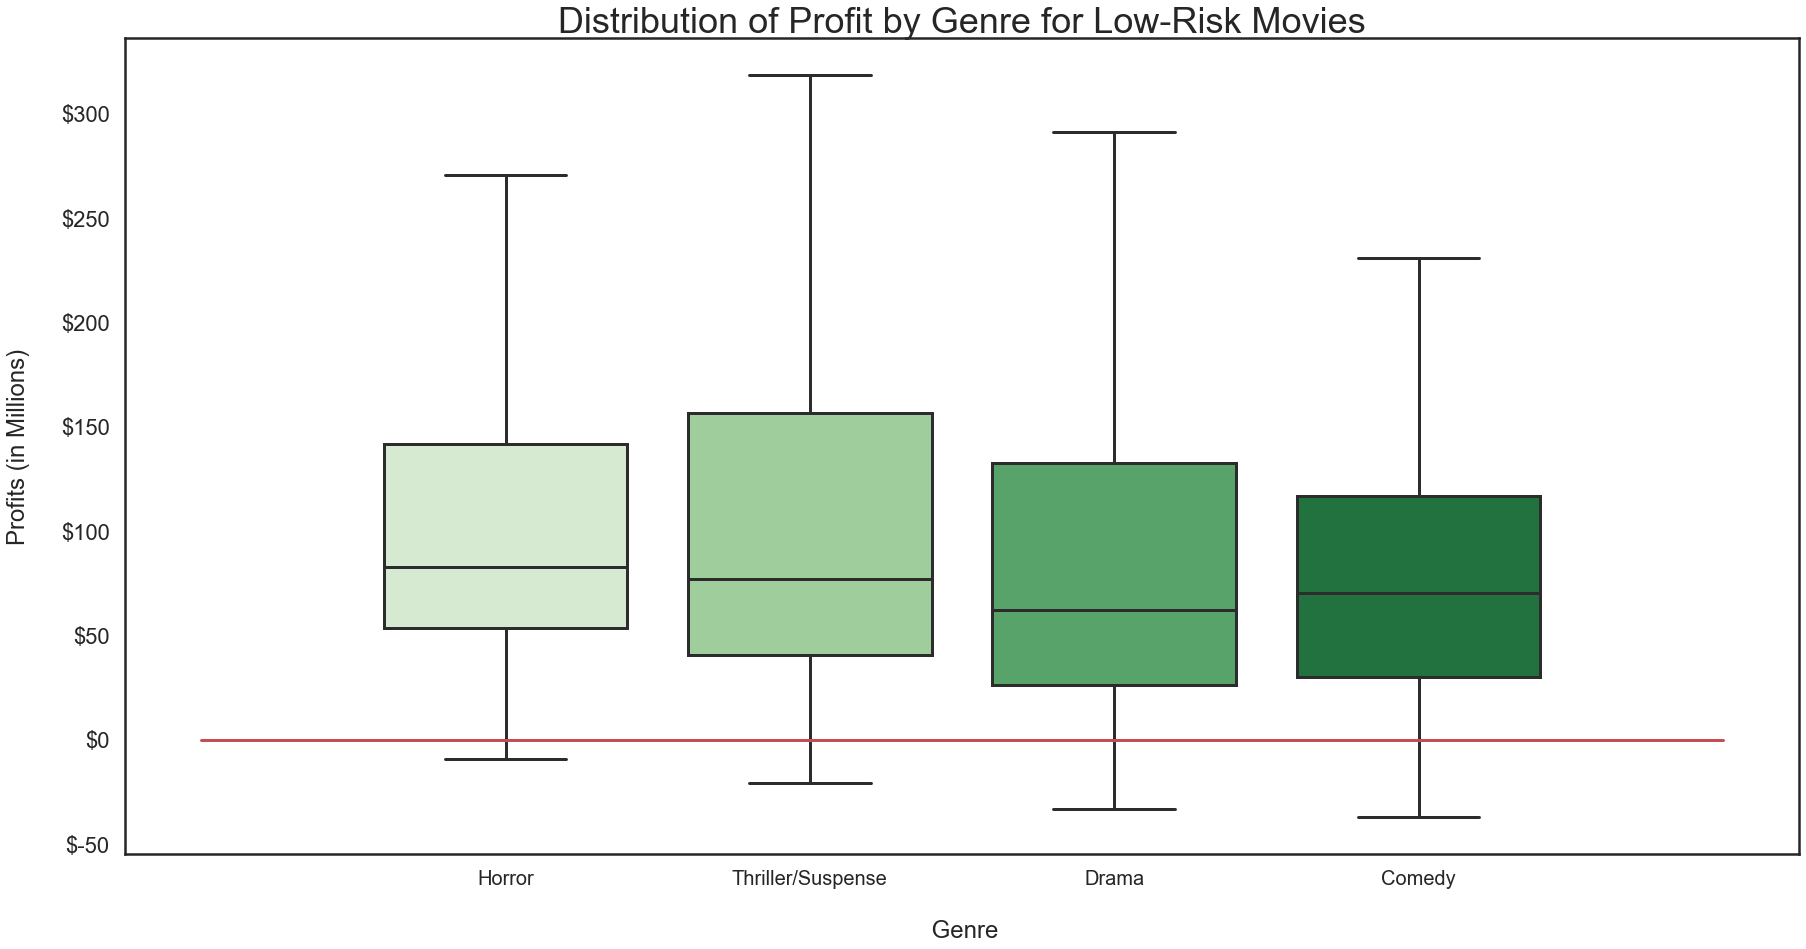

In [20]:
# Fig 2.2.5 Boxplot of Profit Distribution Among Low-Risk Genres
print("Fig 2.2.5")

sns.set(rc={'figure.figsize':(12,9)})
sns.set_context('poster')
sns.set_style('white')

plt.figure(figsize=(30,15))
plt.title("Distribution of Profit by Genre for Low-Risk Movies", size=36)
ax = sns.boxplot(x="Genre", y="NetProfits", data=lr_df, palette='Greens', showfliers=False)
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel("\n Genre", size=24)
ax.set_ylabel("Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax.yaxis.set_major_formatter(format_y)
x_coordinates = [-1, 4]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, color='r')

Fig 2.2.5


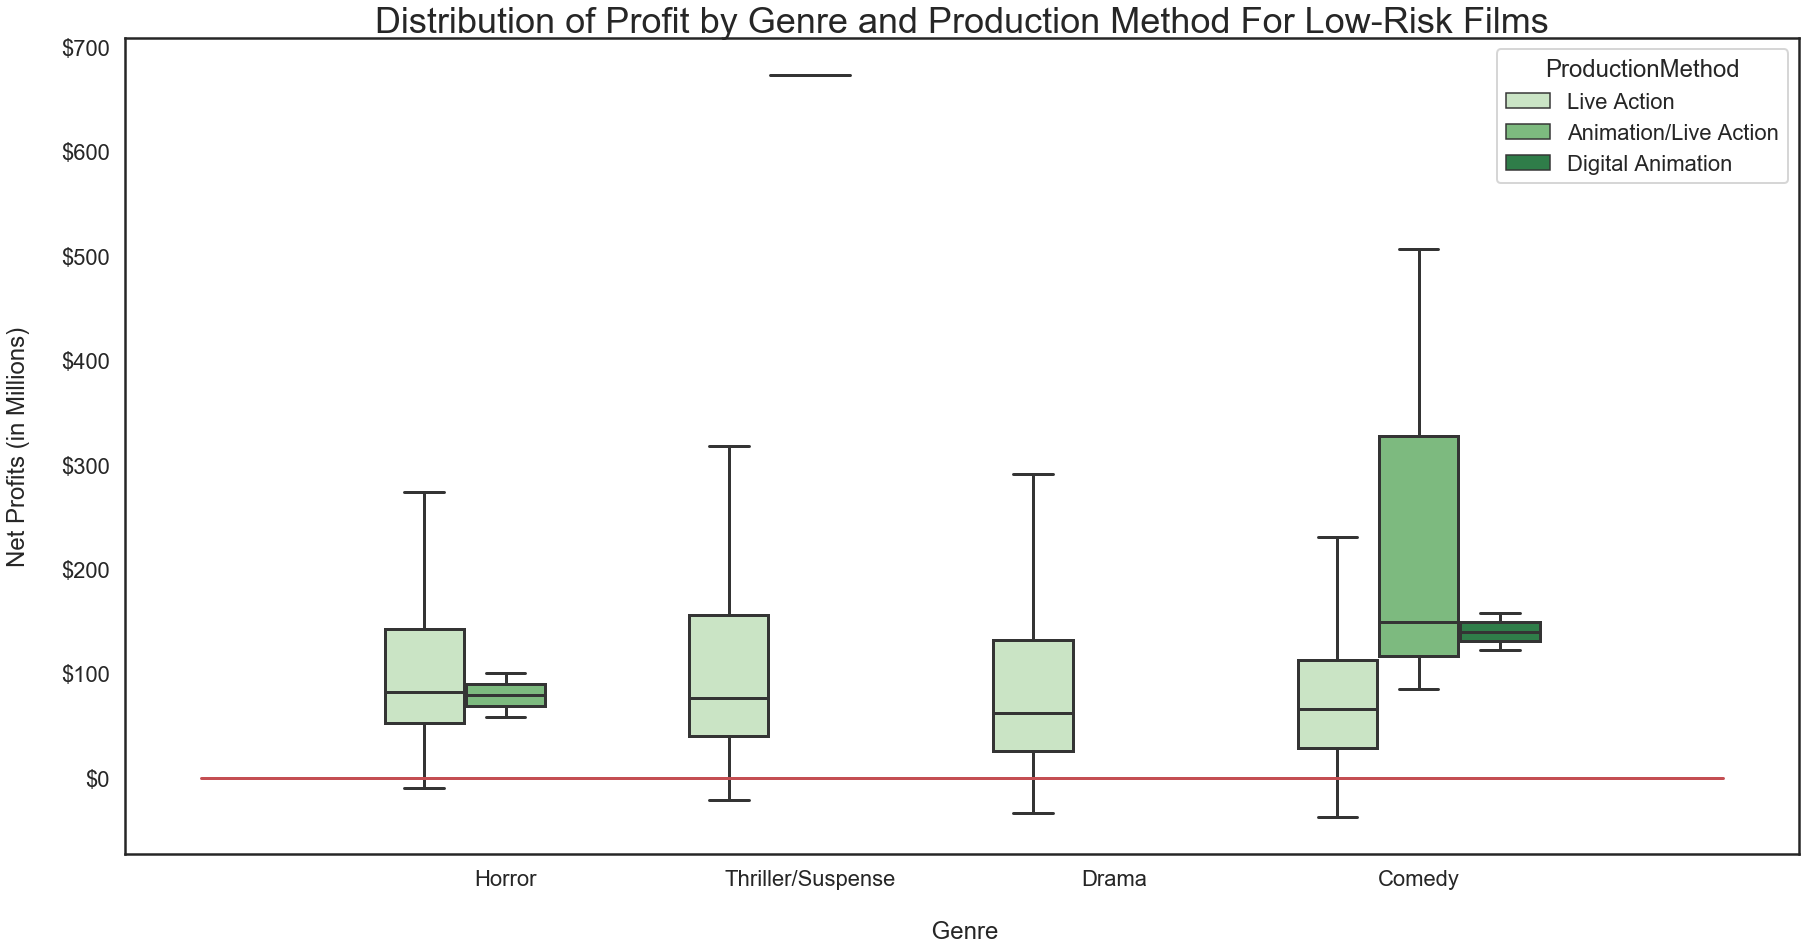

In [21]:
print("Fig 2.2.5")

sns.set_style('white')
sns.set_context('poster')

plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='Genre', y='NetProfits', hue='ProductionMethod', data=lr_df, palette='Greens', showfliers=False)
plt.title("Distribution of Profit by Genre and Production Method For Low-Risk Films", size=36)
plt.xlabel("\n Genre", size=24)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-1, 4]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')

In [22]:
# determining top creative types:
lr_df.CreativeType.value_counts()
lr_df_ct = lr_df[lr_df.CreativeType.isin(['Contemporary Fiction','Dramatization','Historical Fiction','Science Fiction','Fantasy'])]

Fig 2.2.6


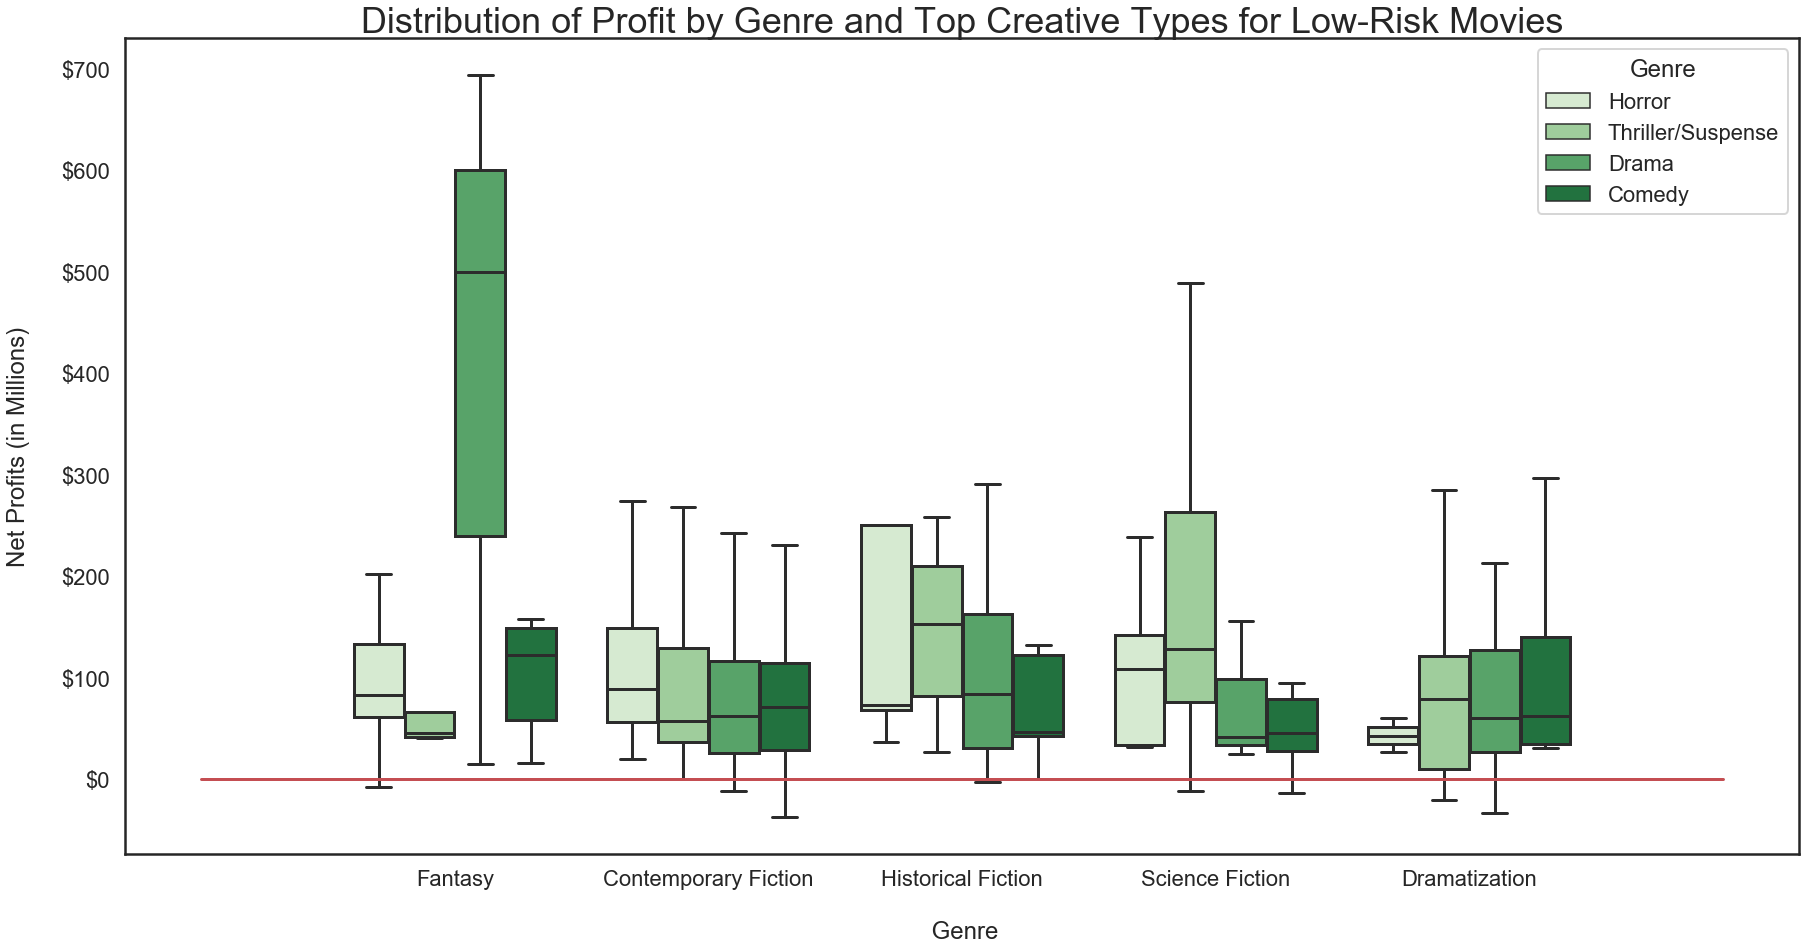

In [23]:
# Fig 2.2.6 Boxplot of Profit Distribution Among Low-Risk Genres by Top Creative Type
print("Fig 2.2.6")

sns.set_context('poster')
sns.set_style('white')

plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='CreativeType', y='NetProfits', hue='Genre', data=lr_df_ct, palette='Greens', showfliers=False)
plt.title("Distribution of Profit by Genre and Top Creative Types for Low-Risk Movies", size=36)
plt.xlabel("\n Genre", size=24)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-1, 5]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')
# need to slant the x lables

## B) How much should we spend?

#### Recommendation
* High-Risk Films:  
    * With respect to ROI, an increase in budget is not associated with a dramatic chage in ROI. However, given the size of the budgets, even modest ROI can generate large actual returns. (Fig 2.3.1)
    * It seems that budgets above 2 billion dollars have lower instances of high ROI, however there is less competition for higher budget movies. (Fig. 2.3.2)
* Low-Risk Films
    * With respect to ROI, increases in budget above 75 million are strongly associated with a lower ROI, so controlling spending in this category is essential. (Fig. 2.3.3)
    * However, prudent increases in spending on the right movies do tend to yield higher net profits, although the risk of yielding losses is much higher. (Fig 2.3.4)

## 2.3 Scatterplots

### High-Risk Movies

Fig 2.3.1


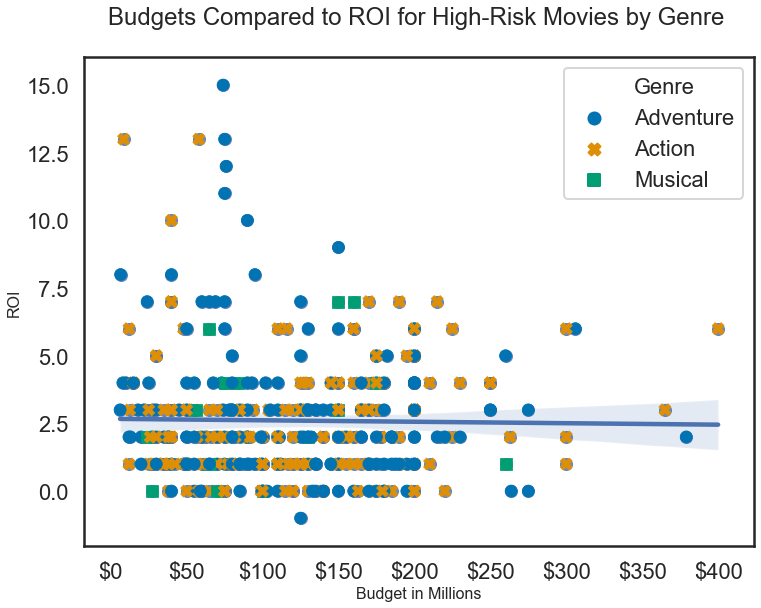

In [24]:
print("Fig 2.3.1")

sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('white')
sns.set_context('poster')

ax = sns.regplot(x="Budget", y="roi", data= hr_df)
sns.scatterplot(x='Budget' , y='roi', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = hr_df)
plt.title("Budgets Compared to ROI for High-Risk Movies by Genre \n", size=24)
plt.xlabel("Budget in Millions", size=16)
plt.ylabel("ROI", size=16)
format_x = FuncFormatter(to_million)
ax.xaxis.set_major_formatter(format_y)

Fig 2.3.2


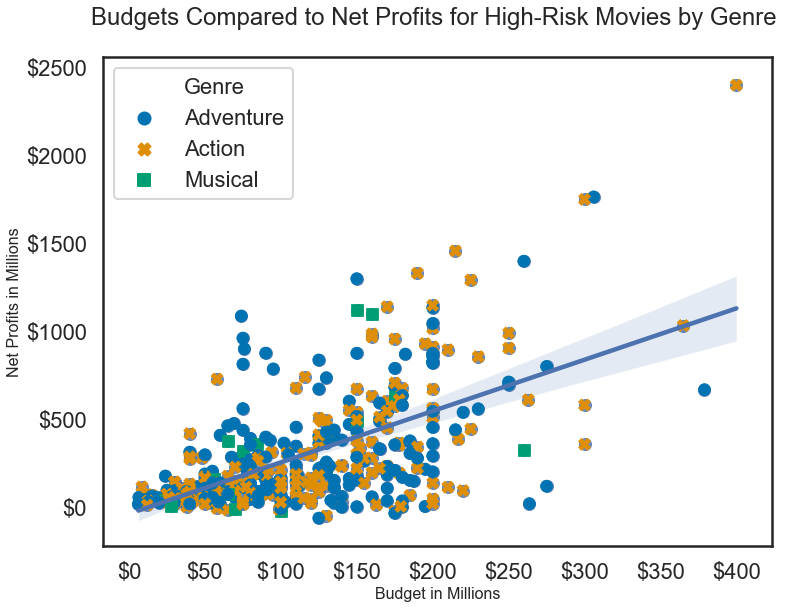

In [25]:
# Fig 2.3.2 Scatterplot of Budgets to Net Profits Among High-Risk Films by Genre
print("Fig 2.3.2")

sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('white')
sns.set_context('poster')

ax = sns.regplot(x="Budget", y="NetProfits", data= hr_df)
sns.scatterplot(x='Budget' , y='NetProfits', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = hr_df)
plt.title("Budgets Compared to Net Profits for High-Risk Movies by Genre \n", size=24)
plt.xlabel("Budget in Millions", size=16)
plt.ylabel("Net Profits in Millions", size=16)
format_xy = FuncFormatter(to_million)
ax.xaxis.set_major_formatter(format_xy)
ax.yaxis.set_major_formatter(format_xy)

### Low-Risk Movies

Fig 2.3.3


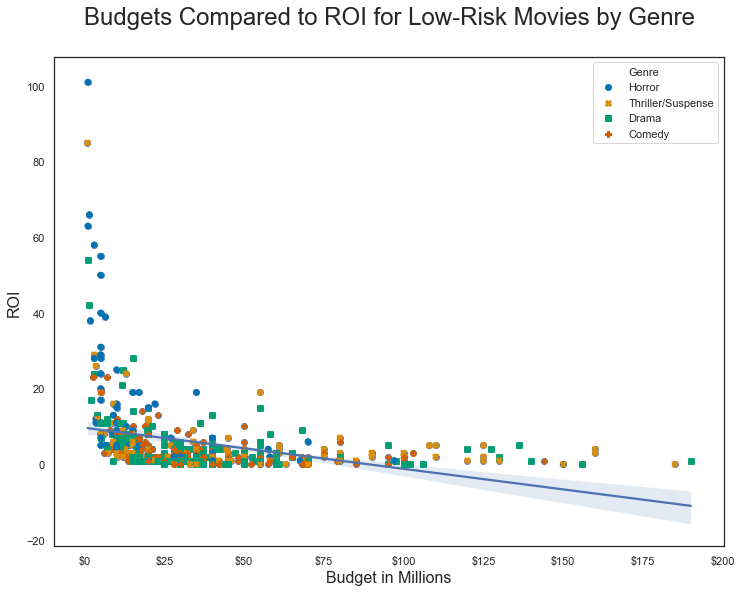

In [26]:
# Fig 2.3.3 Scatterplot of Budgets to ROI Among High-Risk Films by Genre
print("Fig 2.3.3")

sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('white')
sns.set_context('notebook')

ax = sns.regplot(x="Budget", y="roi", data= lr_df)
sns.scatterplot(x='Budget' , y='roi', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = lr_df)
plt.title("Budgets Compared to ROI for Low-Risk Movies by Genre\n", size=24)
plt.xlabel("Budget in Millions", size=16)
plt.ylabel("ROI", size=16)
format_x = FuncFormatter(to_million)
ax.xaxis.set_major_formatter(format_x)

Fig 2.3.4


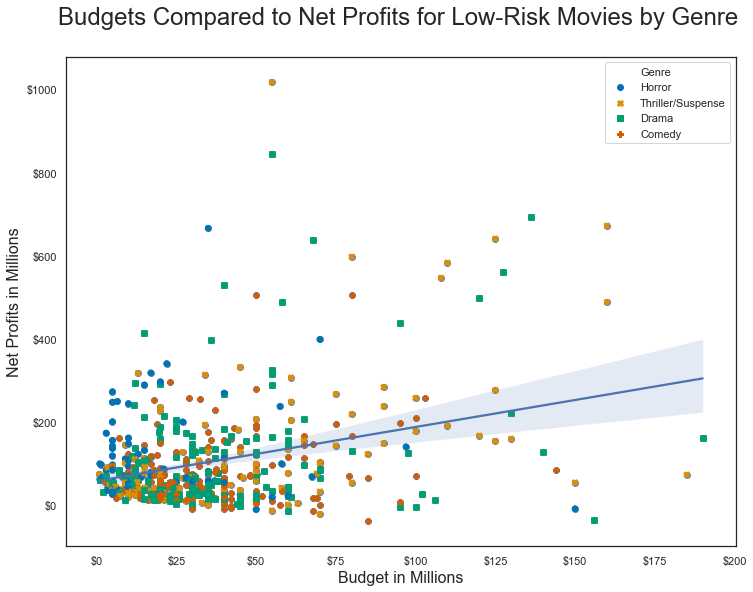

In [27]:
# Fig 2.3.4 Scatterplot of Budgets to ROI Among High-Risk Films by Genre
print("Fig 2.3.4")

sns.set_style('white')
sns.set_context('notebook')

ax = sns.regplot(x="Budget", y="NetProfits", data= lr_df)
sns.scatterplot(x='Budget' , y='NetProfits', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = lr_df)
plt.title("Budgets Compared to Net Profits for Low-Risk Movies by Genre \n", size=24)
plt.xlabel("Budget in Millions", size=16)
plt.ylabel("Net Profits in Millions", size=16)
ax.xaxis.set_major_formatter(format_xy)
ax.yaxis.set_major_formatter(format_xy)

## C) Who is winning in this category?

#### Recommendation
* Determine who the biggest competitors are for each category and generalize about their strategy,
* High-Risk Films:  
    * Walt Disney seems to reap higher than average profits on a smaller number of movies. (Fig. 2.4.2)
    * Walt Disney seems to dominate animated musicals and live-action/animation superhero action movies. (Fig. 2.4.2)
        * strategy one: is to obtain the rights to a popular franchise to compete directly with Disney
        * strategy two: develop an original competitive franchise to offer something unique to the audience
    * Disney on the other hand, produced relatively few films (~40%) less films while achieving, the double the amount of profits that Warner Brothers did. (Fig. 2.4.1)
* Low-Risk Films
    * Warner Bros had the most films that earned a spot on the high-grossing list, yielding a smaller actual average profit. However, their return on investment is higher, emphasizing the value of "bread and butter" films and consistent releases. (Fig. 2.4.1, Fig. 2.4.3)
* Studio to watch:
    * Universal seems to be applying a combined approach, releasing many films, diversified among high-risk and low-risk films, yielding slightly higher profits and ROI. It might be wise to develop a strategy of choosing projects that mirrors Universal's approach. (Fig. 2.4.1, Fig. 2.4.4)
* Based on the data, Universal is producing ~35% High-Risk films, and ~60% Low-Risk films, with the remaining ~5% represented by other genres. (Fig. 2.4.4)
    * strategy: choose approximately 35% High-Risk projects and 65% low-risk profits for a balance of actual profits and ROI

## 2.4 Bar Charts

## General

In [28]:
group = df.groupby(df.TheatricalDistributor)['Budget','WorldwideGross','NetProfits','roi'].mean()
count = df.groupby(df.TheatricalDistributor)['Title'].count()
combine = pd.merge(pd.DataFrame(group).reset_index(), 
                   pd.DataFrame(count).reset_index(), 
                  on='TheatricalDistributor').sort_values(by=['Title'], ascending=False)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Fig 2.4.1


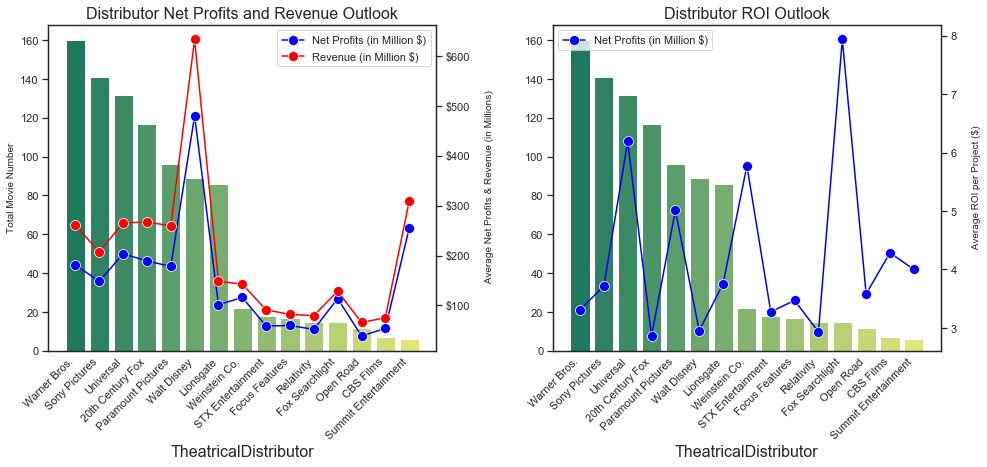

In [29]:
# Fig 2.4.1 Bar Chart Distributor Net Profits and Revenue Outlook
print("Fig 2.4.1")

# Putting Total movie number, revenue, and net profits together
sns.set_style('white')
sns.set_context('notebook')

fig, (ax1, ax4) = plt.subplots(1,2,figsize=(16,6))
plt.subplots_adjust(wspace=0.3)


# Total Production number
ax1.set_title('Distributor Net Profits and Revenue Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number', ax=ax1)
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='TheatricalDistributor', y='WorldwideGross', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Second chart
# Number of counts
ax4.set_title('Distributor ROI Outlook', fontsize=16)
ax4.set_xlabel('\n Distributor Name', fontsize=16)
ax4 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number', ax=ax4)
ax4.tick_params(axis='x', rotation = 45, length=2)
ax4.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')
ax4.set_ylabel("\n")

# ROI per Distributor
ax5 = ax4.twinx()

ax5 = sns.lineplot(x='TheatricalDistributor', y='roi', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax5.set_ylabel('\n Average ROI per Project ($)', fontsize = 10)
ax5.set_xlabel('\n Distributor Name', fontsize=16)
ax4.grid(False)
ax5.grid(False)

# Competitive Distributors

### High-Risk Movies: Walt Disney

In [30]:
group_genre = df.groupby(['TheatricalDistributor', 'Genre']).agg({"WorldwideGross": "mean", 
                                                                  "NetProfits": "mean",
                                                                 "Title": "count"})
genre_group_df = pd.DataFrame(group_genre).reset_index()
genre_topstudio = genre_group_df[genre_group_df.TheatricalDistributor.isin(['Warner Bros.', 
                                                                           'Sony Pictures',
                                                                           'Universal',
                                                                           '20th Century Fox',
                                                                           'Paramount Pictures',
                                                                           'Walt Disney',
                                                                            'Summit Entertainment'])]

genre_topstudio = genre_topstudio.sort_values(by = ['TheatricalDistributor', 'Title'], ascending=False)
genre_topstudio.head()

,TheatricalDistributor,Genre,WorldwideGross,NetProfits,Title
133,Warner Bros.,Comedy,1.298471e+08,8.900890e+07,34
130,Warner Bros.,Action,4.485057e+08,3.015057e+08,29
131,Warner Bros.,Adventure,3.837626e+08,2.555557e+08,29
134,Warner Bros.,Drama,1.333937e+08,8.746271e+07,29
135,Warner Bros.,Horror,2.618582e+08,2.328224e+08,14


Fig 2.4.2


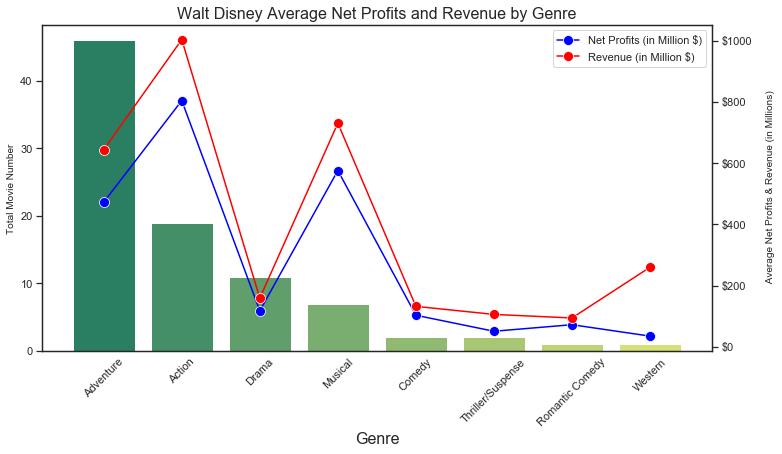

In [31]:
# Fig 2.4.2 Bar Chart Distributor Net Profits and Revenue Outlook for Walt Disney with Genre Breakdown
print("Fig 2.4.2")


# Walt Disney detailed graph
df_wd = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Walt Disney']


fig, ax1 = plt.subplots(figsize=(12,6))

# Total Production number

ax1.set_title('Walt Disney Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_wd, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue and profit lines

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_wd, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_wd, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')



# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

### Low-Risk Movies: Warner Bros.

Fig 2.4.3


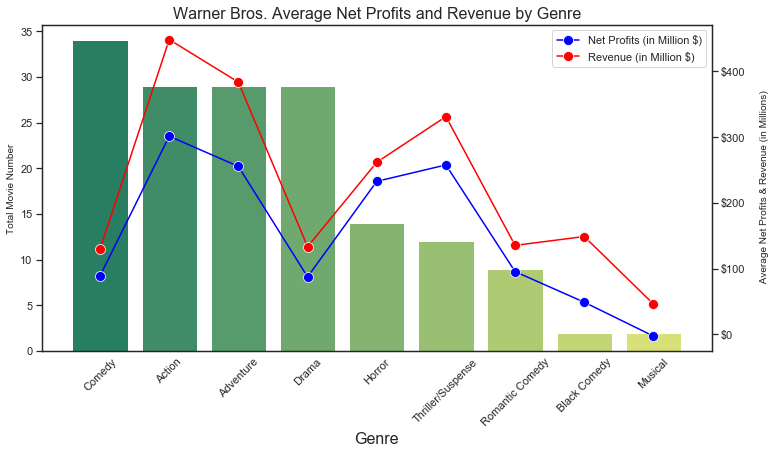

In [32]:
# Fig 2.4.3 Bar Chart Distributor Net Profits and Revenue Outlook for Warner Brothers with Genre Breakdown
print("Fig 2.4.3")

# Warner Bros. detailed graph
df_wb = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Warner Bros.']


fig, ax1 = plt.subplots(figsize=(12,6))

# Total Production number

ax1.set_title('Warner Bros. Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_wb, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue and profit lines

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_wb, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_wb, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

### The One to Watch: Universal

Fig 2.4.4


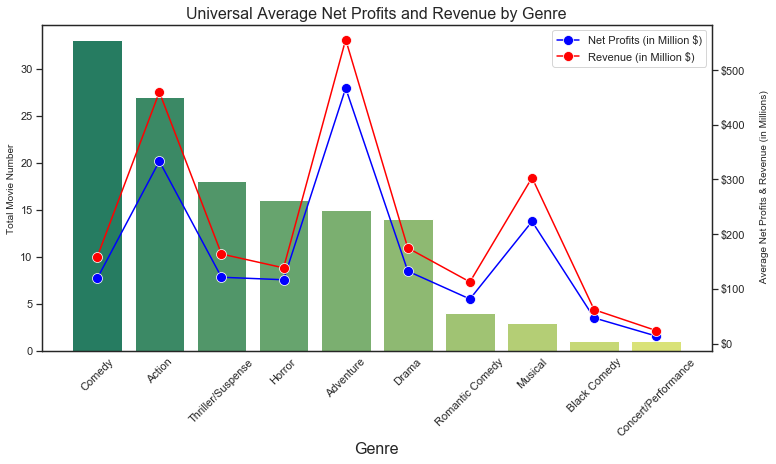

In [33]:
# Fig 2.4.4 Bar Chart Distributor Net Profits and Revenue Outlook for Universal with Genre Breakdown
print("Fig 2.4.4")

# Universal detailed graph
df_uni = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Universal']


fig, ax1 = plt.subplots(figsize=(12,6))

# Total Production number

ax1.set_title('Universal Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_uni, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue and profit lines

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_uni, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_uni, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

In [34]:
# What's percentage breakdown of Universal? (Total profit of different genres)
df_uni['percentage'] = df_uni['NetProfits'] * df_uni['Title'] / sum(df_uni['NetProfits'] * df_uni['Title'])
df_uni

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TheatricalDistributor,Genre,WorldwideGross,NetProfits,Title,percentage
115,Universal,Comedy,1.584925e+08,1.189925e+08,33,0.146092
112,Universal,Action,4.596485e+08,3.332411e+08,27,0.334747
121,Universal,Thriller/Suspense,1.636290e+08,1.211456e+08,18,0.081129
118,Universal,Horror,1.383048e+08,1.165548e+08,16,0.069382
113,Universal,Adventure,5.556694e+08,4.667694e+08,15,0.260488
117,Universal,Drama,1.746606e+08,1.323034e+08,14,0.068912
120,Universal,Romantic Comedy,1.125773e+08,8.132732e+07,4,0.012103
119,Universal,Musical,3.031050e+08,2.231050e+08,3,0.024901
114,Universal,Black Comedy,6.178839e+07,4.678839e+07,1,0.001741
116,Universal,Concert/Performance,2.359104e+07,1.359104e+07,1,0.000506
